<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.09, random_state=5)

<Axes: >

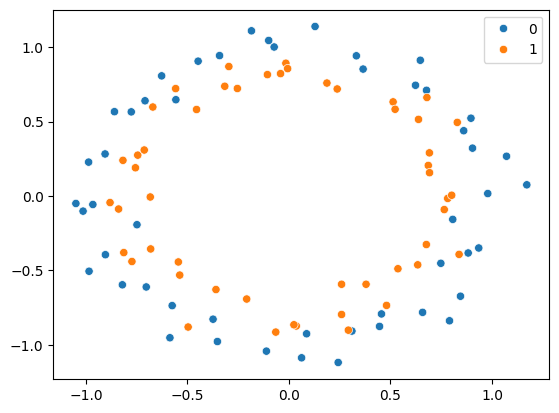

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

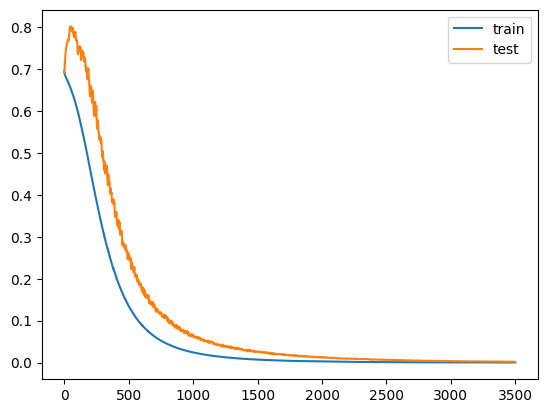

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


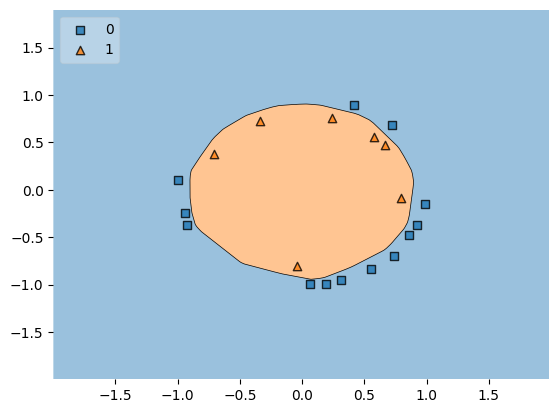

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 55ms/step - loss: 0.6759 - accuracy: 0.5750 - val_loss: 0.7123 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6754 - accuracy: 0.5875 - val_loss: 0.7122 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.5875 - val_loss: 0.7129 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6742 - accuracy: 0.5750 - val_loss: 0.7129 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6735 - accuracy: 0.5875 - val_loss: 0.7126 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6729 - accuracy: 0.5875 - val_loss: 0.7123 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6722 - accuracy: 0.5875 - val_loss: 0.7124 - val_accuracy: 0.4000
Epoch 8/3500


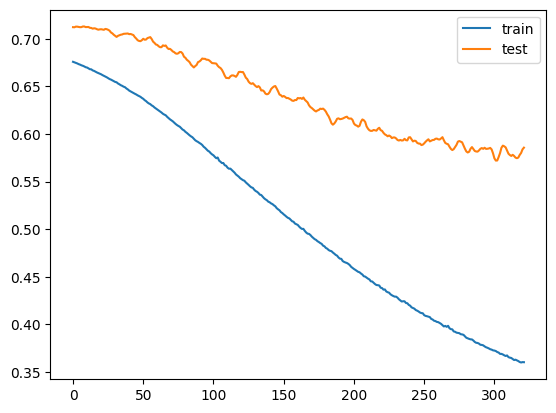

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


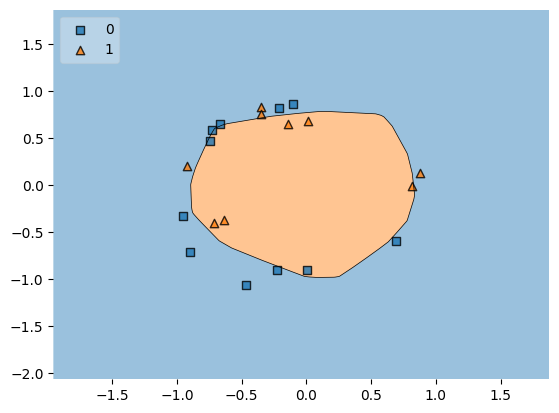

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()